In [32]:
import params
import pandas as pd
import numpy as np
import training
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from matplotlib.pyplot import figure

In [2]:
df = pd.read_pickle(params.PICKLE_DATASET_WITH_FEATURES_PATH)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13676 entries, 0 to 13675
Columns: 120 entries, log_attack_time to drum_type
dtypes: float64(119), object(1)
memory usage: 12.5+ MB


In [4]:
(df[df['drum_type'] == 'kick']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3550 entries, 46 to 13655
Columns: 120 entries, log_attack_time to drum_type
dtypes: float64(119), object(1)
memory usage: 3.3+ MB


In [5]:
(df[df['drum_type'] == 'snare']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4460 entries, 23 to 13650
Columns: 120 entries, log_attack_time to drum_type
dtypes: float64(119), object(1)
memory usage: 4.1+ MB


In [6]:
(df[df['drum_type'] == 'hat']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4916 entries, 0 to 13675
Columns: 120 entries, log_attack_time to drum_type
dtypes: float64(119), object(1)
memory usage: 4.5+ MB


In [7]:
(df[df['drum_type'] == 'tom']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 12 to 13651
Columns: 120 entries, log_attack_time to drum_type
dtypes: float64(119), object(1)
memory usage: 709.0+ KB


In [9]:
train_X, train_Y, test_X, test_Y, labels = training.split_data(df)

INFO:training:Model output can be decoded with the following order of drum types: ['hat', 'tom', 'snare', 'kick']
INFO:training:None
INFO:training:7312 training sounds, 2438 validation sounds


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9750 entries, 0 to 13651
Columns: 121 entries, log_attack_time to drum_type_labels
dtypes: float64(119), int64(1), object(1)
memory usage: 9.1+ MB


In [13]:
model = training.train("random_forest", train_X, train_Y, test_X, test_Y, labels)

INFO:training:random_forest:
INFO:training:              precision    recall  f1-score   support

         hat       0.93      0.93      0.93       749
         tom       0.83      0.66      0.74       174
       snare       0.92      0.95      0.94       774
        kick       0.94      0.96      0.95       741

    accuracy                           0.93      2438
   macro avg       0.91      0.87      0.89      2438
weighted avg       0.92      0.93      0.92      2438



In [21]:
print(labels)

['hat', 'tom', 'snare', 'kick']


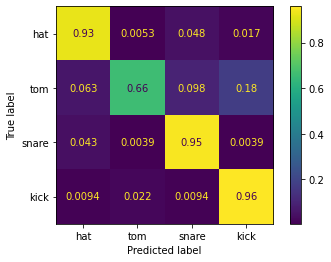

<Figure size 360x360 with 0 Axes>

In [35]:
plot_confusion_matrix(model, test_X, test_Y, display_labels=labels, normalize='true')
plt.figure(figsize=(5, 5))
plt.show()

Feature ranking:
1. feature 43 (0.069527)
2. feature 16 (0.057500)
3. feature 41 (0.051401)
4. feature 21 (0.048972)
5. feature 15 (0.039611)
6. feature 42 (0.033000)
7. feature 46 (0.030844)
8. feature 20 (0.029000)
9. feature 19 (0.026352)
10. feature 51 (0.025959)
11. feature 47 (0.025090)
12. feature 36 (0.023825)
13. feature 17 (0.022745)
14. feature 52 (0.021736)
15. feature 24 (0.020353)
16. feature 49 (0.020069)
17. feature 113 (0.019644)
18. feature 35 (0.018098)
19. feature 101 (0.016359)
20. feature 115 (0.015377)
21. feature 22 (0.011120)
22. feature 50 (0.010087)
23. feature 107 (0.009789)
24. feature 89 (0.009787)
25. feature 109 (0.009014)
26. feature 23 (0.008601)
27. feature 44 (0.008434)
28. feature 48 (0.008175)
29. feature 117 (0.007963)
30. feature 58 (0.007843)
31. feature 55 (0.007372)
32. feature 39 (0.007154)
33. feature 27 (0.006765)
34. feature 105 (0.006568)
35. feature 10 (0.006563)
36. feature 37 (0.006100)
37. feature 103 (0.005917)
38. feature 18 (0.0055

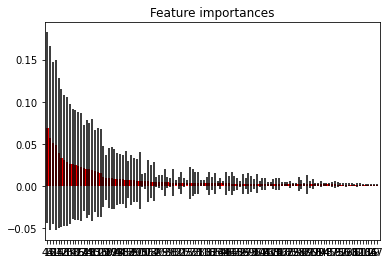

In [30]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(test_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(test_X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(test_X.shape[1]), indices)
plt.xlim([-1, test_X.shape[1]])
plt.show()